In [2]:
import pymongo
from pymongo import MongoClient
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
import warnings
import sys
import os
def nbipath():
    os.chdir('..')
    path = os.getcwd()+'/nbi'
    return path 

sys.path.insert(0, nbipath())
from nbi1 import *

from numpy.random import randn
from scipy.stats import anderson
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import scipy

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats


import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

warnings.filterwarnings('ignore')

### Preprocessing Functions

In [3]:
def convertStringListtoList(List):
    return  [int(i) for i in List[1:-1].split(',')]

### Data Selection 

In [4]:

df = pd.read_csv("/Users/AkshayKale/Documents/github/data/nbi/06-20-19-thesis-dataset-without-outliers_allstates", index_col=0)

# Select records from 2017
df = df[df['Year Last'] == 2017]

### Create a row of the bridges with the last age of the bridges

In [5]:
last_age = []
for ages in df['Age']:   
    last_age.append(convertStringListtoList(ages)[-1])
    
df['last age'] = last_age

## Creating a dictionary of ages and the number of bridges

In [6]:
# create dictionary_bsd_a
above = {a:0 for a in range(1,150)} 
below = {b:0 for b in range(1,150)}

for age, bsd in zip(df['last age'], df['Baseline Difference Score']):
    if bsd < 0:
        below[age] = below[age] + 1
    else:
        above[age] = above[age] + 1

### Counting bridges above and below the bsd of zero

In [7]:
total = []
for a, b in zip(above.values(), below.values()):
    t = a + b
    total.append(t)
    
total = total[1:90]
percent_above = []
percent_below = []

for a, b, t in zip(above.values(),below.values(), total):
    percent_above.append(a/t)
    percent_below.append(b/t)

### Visualization of the Number of the bridges above and below BDS of Zero

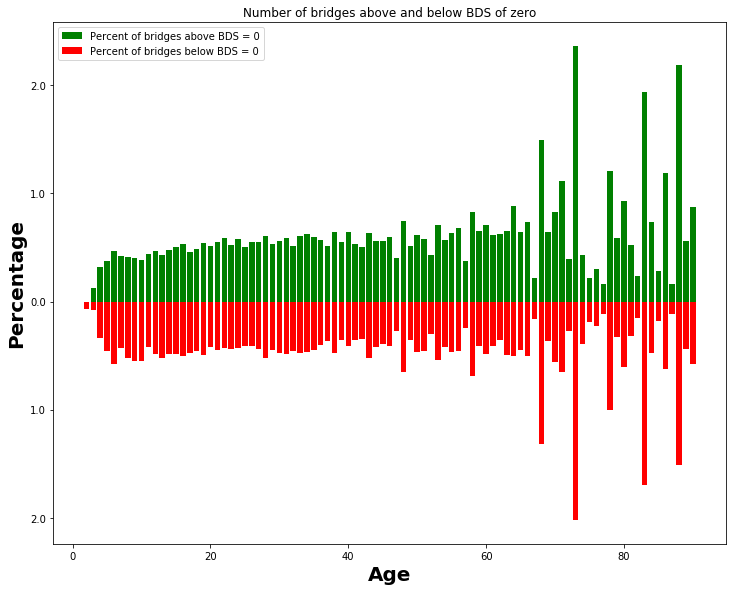

In [8]:
y = [i for i in range(2, 91, 1)]
d_1 = percent_above
d_2 = -1 * np.array(percent_below)


fig, ax = plt.subplots(figsize=(10,8))
ax.bar( y, d_1, color='green', label='Percent of bridges above BDS = 0')
ax.bar( y, d_2, color='red', label='Percent of bridges below BDS = 0')

# Formatting x labels
plt.title("Number of bridges above and below BDS of zero")
# plt.title("using data of the bridges present in 2017")
plt.tight_layout()
# Use absolute value for y-ticks
ticks =  ax.get_yticks()
ax.set_yticklabels([abs(tick) for tick in ticks])
plt.ylabel("Percentage", fontweight='bold', fontsize=20)
plt.xlabel("Age", fontweight='bold', fontsize=20)
plt.legend()
plt.show()